In [225]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [226]:
!kaggle datasets download -d salader/dogs-vs-cats


dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [227]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [228]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import matplotlib.pyplot as mp
from keras.regularizers import l2


In [229]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.

Found 5000 files belonging to 2 classes.


In [230]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)



In [231]:

# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_6"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       

                                                                 

 batch_normalization_18 (Bat  (None, 254, 254, 32)     128       

 chNormalization)                                                

                                                                 

 max_pooling2d_18 (MaxPoolin  (None, 127, 127, 32)     0         

 g2D)                                                            

                                                                 

 conv2d_19 (Conv2D)          (None, 125, 125, 64)      18496     

                                                                 

 batch_normalization_19 (Bat  (None, 125, 125, 64)     256       

 chNormalization)                                                

                                      

In [232]:
model.summary()

Model: "sequential_6"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       

                                                                 

 batch_normalization_18 (Bat  (None, 254, 254, 32)     128       

 chNormalization)                                                

                                                                 

 max_pooling2d_18 (MaxPoolin  (None, 127, 127, 32)     0         

 g2D)                                                            

                                                                 

 conv2d_19 (Conv2D)          (None, 125, 125, 64)      18496     

                                                                 

 batch_normalization_19 (Bat  (None, 125, 125, 64)     256       

 chNormalization)                                                

                                      

In [233]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [234]:

history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10

625/625 [==============================] - 71s 106ms/step - loss: 1.3052 - accuracy: 0.6168 - val_loss: 0.5994 - val_accuracy: 0.6642

Epoch 2/10

625/625 [==============================] - 66s 105ms/step - loss: 0.5464 - accuracy: 0.7297 - val_loss: 0.5020 - val_accuracy: 0.7560

Epoch 3/10

625/625 [==============================] - 67s 106ms/step - loss: 0.4560 - accuracy: 0.7869 - val_loss: 0.4954 - val_accuracy: 0.7510

Epoch 4/10

625/625 [==============================] - 68s 108ms/step - loss: 0.3930 - accuracy: 0.8213 - val_loss: 0.4684 - val_accuracy: 0.7836

Epoch 5/10

625/625 [==============================] - 66s 105ms/step - loss: 0.3315 - accuracy: 0.8543 - val_loss: 0.4381 - val_accuracy: 0.8200

Epoch 6/10

625/625 [==============================] - 67s 106ms/step - loss: 0.2689 - accuracy: 0.8856 - val_loss: 0.5112 - val_accuracy: 0.8028

Epoch 7/10

625/625 [==============================] - 67s 107ms/step - loss: 0.1894 - accuracy: 0.9229 - val_loss: 0.

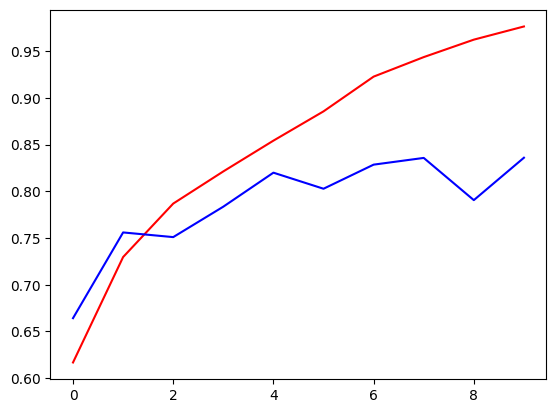

In [235]:
mp.plot(history.history['accuracy'],color='red',label='train')
mp.plot(history.history['val_accuracy'],color='blue',label='test')

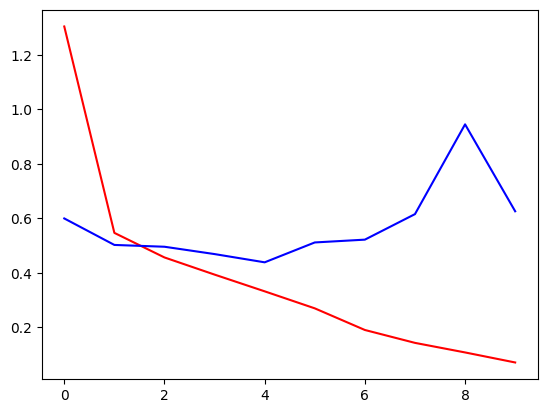

In [236]:
mp.plot(history.history['loss'],color='red',label='train')
mp.plot(history.history['val_loss'],color='blue',label='test')

In [237]:
import cv2 as c

In [238]:
t_img=c.imread('/content/train/cats/cat.10005.jpg')

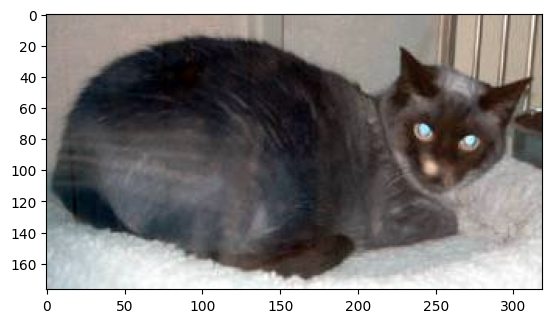

In [239]:
mp.imshow(t_img)

In [240]:
t_img.shape

(177, 319, 3)

In [241]:
tmp_img=c.resize(t_img,(256,256))

In [242]:
tm_inp=tmp_img.reshape((1,256,256,3))

In [243]:
tm_inp.shape

(1, 256, 256, 3)

In [244]:
model.predict(tm_inp)


1/1 [==============================] - 0s 167ms/step


array([[0.]], dtype=float32)

In [245]:

if (model.predict(tm_inp))==1:
    print("DOG")
else:
    print("CAT")


1/1 [==============================] - 0s 28ms/step

CAT
